In [1]:
#import packages used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("..\capstone_project_SQL_code"))
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import re
from collections import Counter 
from textblob import TextBlob

#confirm that required dictionaries are downloaded for NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

#set styles for matplotlib/seaborn
%matplotlib inline
plt.style.use('fivethirtyeight')

['.ipynb_checkpoints', 'Capstone Python.ipynb', 'Las Vegas Visualizations.pptx', 'Las Vegas Visualizations.twb', 'las_vegas_businesses.csv', 'las_vegas_reviews.csv', 'las_vegas_service_reviews.csv', 'SpaCy.ipynb', 'SQL Files', 'sql1.png', 'sql2_reviewcount.png', 'Untitled.ipynb', 'Untitled1.ipynb', 'YelpCSVFiles']
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siont\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siont\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siont\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#create functions for analysis
i = nltk.corpus.stopwords.words('english')
j = list(string.punctuation)
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

def tokenize_text(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)


def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [3]:
#reading in CSV files with Pandas
lv_business = pd.read_csv('..\capstone_project_SQL_code\las_vegas_businesses.csv')
lv_reviews = pd.read_csv('..\capstone_project_SQL_code\las_vegas_reviews.csv')
lv_svc_reviews = pd.read_csv('..\capstone_project_SQL_code\las_vegas_service_reviews.csv') #custom query with only reviews that mention service

In [4]:
#Overall Las Vegas Business

Text(0.5, 1.0, 'Overall Rating Distribution')

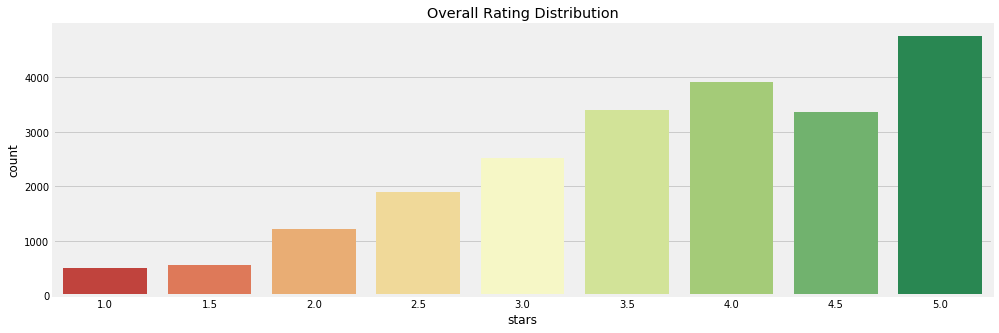

In [5]:
plt.figure(figsize=(15,5))
ctstr = sns.countplot(lv_business['stars'], palette = 'RdYlGn')
plt.title('Overall Rating Distribution')

C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Top review count in Las Vegas')

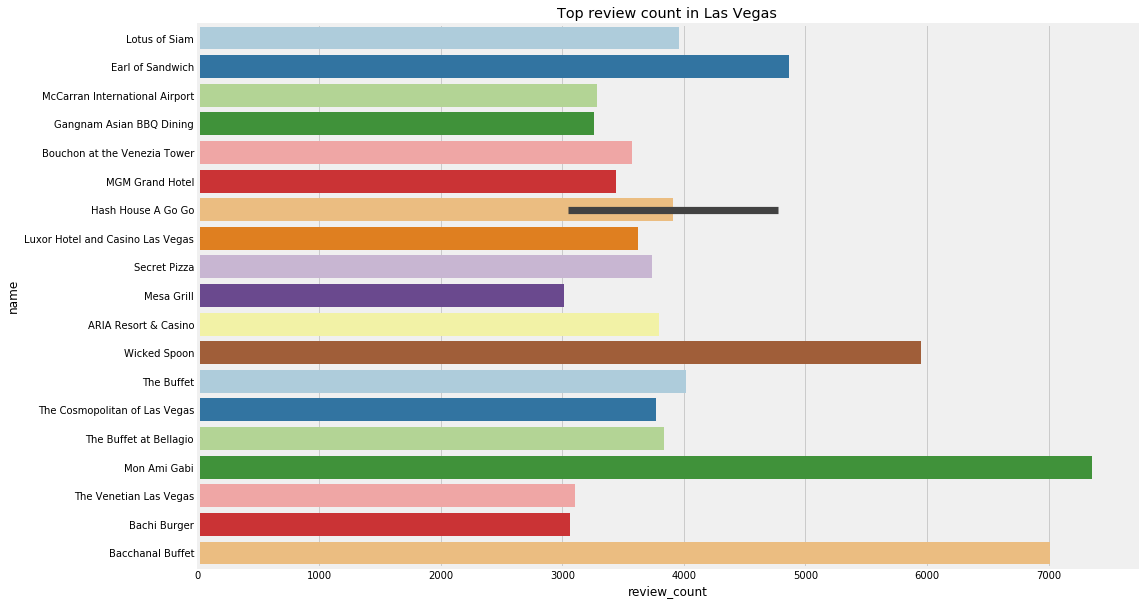

In [6]:
plt.figure(figsize = (15,10))
sns.barplot(lv_business[lv_business['review_count'] >3000]['review_count'],lv_business[lv_business['review_count'] >3000]['name'], palette='Paired')
plt.title('Top review count in Las Vegas')

In [6]:
#Overall Las Vegas Reviews Analysis

In [7]:
#tokenize reviews in complete dataset
lv_reviews['token_text'] = lv_reviews['text'].apply(tokenize_text)

In [8]:
lv_reviews.head()

,business_id,name,review_id,stars,date,text,main_category,token_text
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,lgpSS6UsKYIvnQaw8JwHlQ,5,2005-04-27,"A Las Vegas classic, great steaks, a nice rend...",Cajun/Creole,las vegas classic great steaks nice rendition ...
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,B45SjrSgVXDw2EPlFCsBoQ,5,2006-01-07,Love going to Delmonico's almost everytime I g...,Cajun/Creole,love going delmonicos almost everytime go las ...
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,rIwd3sRWVrN7d0vxdiLeYA,5,2006-01-20,one of the best steaks i've ever had. amazing...,Cajun/Creole,one best steaks ive ever amazing waiter attend...
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,aQQIcQfFYawLYU85oGRxhQ,5,2006-03-07,"Oh. My. Lord. Best steak I've ever had, sup...",Cajun/Creole,oh lord best steak ive ever super tender tasty...
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,-7O72HqM4eJF0NMCgdLjCQ,5,2006-03-23,My client took me here after the MAGIC Show an...,Cajun/Creole,client took magic show phenomenal steak danced...


(-0.5, 1999.5, 999.5, -0.5)

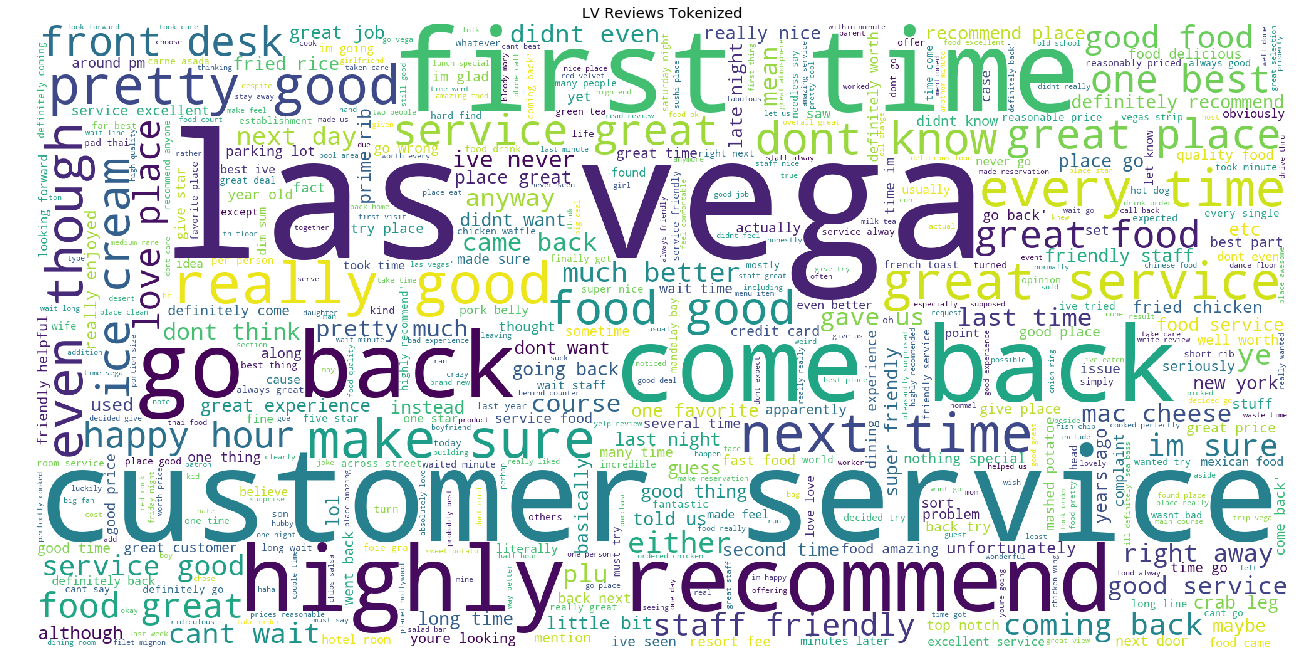

In [10]:
#Wordcloud Visualization of Word Occurences in Tokenized Text
lvreviewwc = WordCloud(width=2000, height=1000, random_state=1, max_words=500, background_color='white').generate(str(set(lv_reviews['token_text'])))
plt.figure(figsize=(20, 15))
plt.title('LV Reviews Tokenized')
plt.imshow(lvreviewwc)
plt.axis('off')

In [11]:
#count of most common tokens
tokens = Counter()
key = results.keys()
lv_reviews['token_text'].str.lower().str.split().apply(tokens.update)
print(tokens.most_common(20))

[('good', 678874), ('place', 667117), ('food', 663448), ('great', 607644), ('like', 527265), ('service', 520731), ('get', 518143), ('time', 514734), ('one', 493935), ('would', 440700), ('back', 419560), ('vegas', 395659), ('go', 382654), ('really', 368114), ('us', 341487), ('got', 310653), ('also', 307125), ('even', 292551), ('dont', 289971), ('nice', 274019)]


In [12]:
#generate bigrams and trigrams to understand most common tuples of words
lvrv_bigrams = Counter(generate_ngrams(str(set(lv_reviews['token_text'])), n=2))
lvrv_trigrams = Counter(generate_ngrams(str(set(lv_reviews['token_text'])), n=3))

In [15]:
#print las vegas review bigrams
print(lvrv_bigrams.most_common(20))

[('las vegas', 108596), ('customer service', 83589), ('first time', 60789), ('come back', 60019), ('go back', 52671), ('highly recommend', 50817), ('really good', 42893), ('next time', 42406), ('pretty good', 36699), ('make sure', 36154), ('great service', 35445), ('ive ever', 35028), ('every time', 34166), ('even though', 33258), ('food good', 32348), ('ice cream', 30769), ('dont know', 29881), ('service great', 29741), ('coming back', 28635), ('love place', 28467)]


In [16]:
#print las vegas review bigrams
print(lvrv_trigrams.most_common(20))

[('definitely come back', 10026), ('great customer service', 9958), ('would highly recommend', 8647), ('would definitely recommend', 7776), ('definitely coming back', 7049), ('would come back', 6419), ('cant go wrong', 6344), ('wait go back', 6218), ('cant wait go', 6104), ('would go back', 5999), ('next time im', 5950), ('highly recommend place', 5876), ('definitely go back', 5556), ('food great service', 5545), ('back next time', 5287), ('mac n cheese', 4983), ('best ive ever', 4508), ('great food great', 4462), ('would definitely come', 4435), ('never go back', 4237)]


In [17]:
#sentiment analysis with TextBlob
lv_reviews['sentiment'] = lv_reviews['token_text'].apply(sentiment)

In [18]:
lv_reviews['sentiment_rating'] = ''
lv_reviews['sentiment_rating'][lv_reviews['sentiment'] > 0] = 'positive'
lv_reviews['sentiment_rating'][lv_reviews['sentiment'] < 0] = 'negative'
lv_reviews['sentiment_rating'][lv_reviews['sentiment'] == 0] = 'neutral'

C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the 

Text(0.5, 1.0, 'LV Review Sentiments')

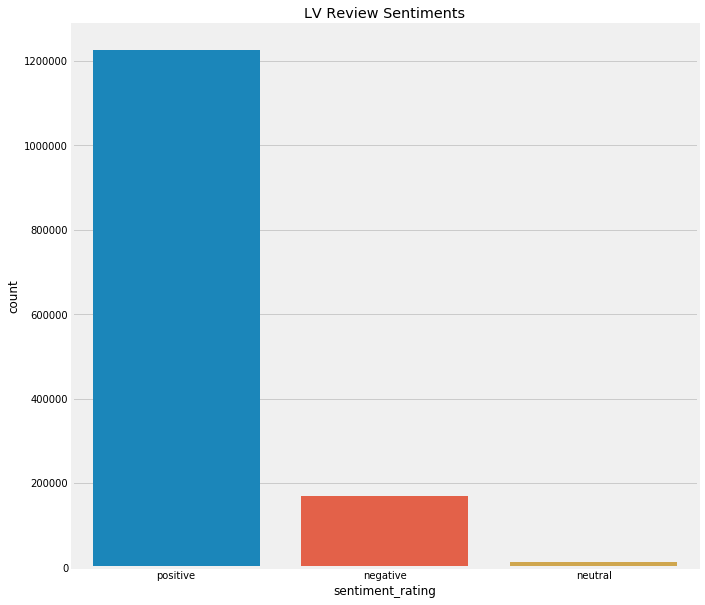

In [19]:
plt.figure(figsize=(10,10))
lvr_sentiment = sns.countplot(lv_reviews['sentiment_rating'])
plt.title('LV Review Sentiments')

In [20]:
#same analysis with filtered reviews for keyword service to determine if there is any difference
lv_svc_reviews['token_text'] = lv_svc_reviews['text'].apply(tokenize_text)

(-0.5, 1499.5, 499.5, -0.5)

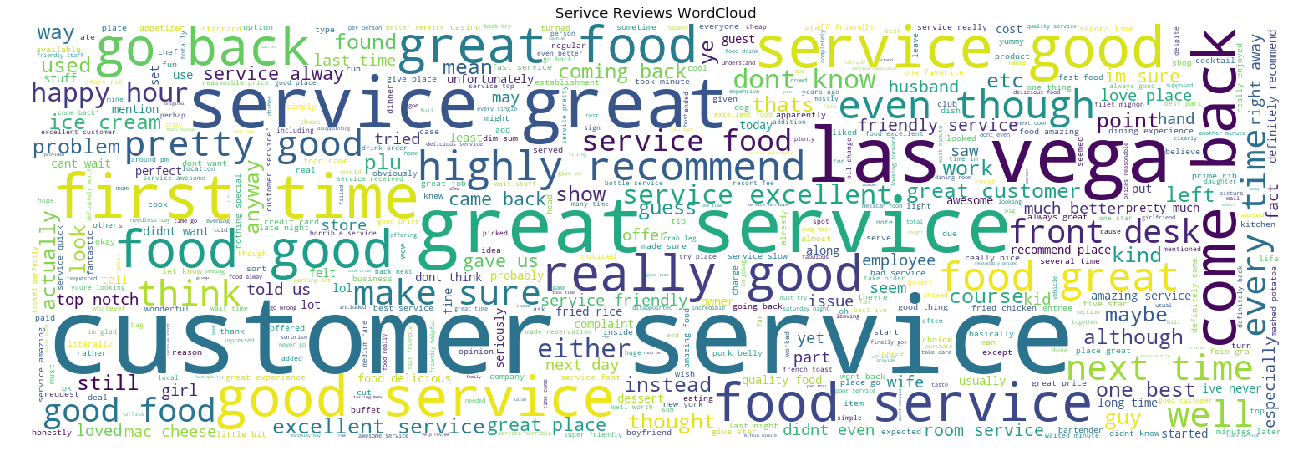

In [21]:
svcwordcloud = WordCloud(width=1500, height=500, random_state=1, max_words=500, background_color='white').generate(str(set(lv_svc_reviews['token_text'])))
plt.figure(figsize=(20, 15))
plt.title('Serivce Reviews WordCloud')
plt.imshow(svcwordcloud)
plt.axis('off')

In [22]:
svcbigrams = Counter(generate_ngrams(str(set(lv_svc_reviews['token_text'])), n=2))
svctrigrams = Counter(generate_ngrams(str(set(lv_svc_reviews['token_text'])), n=3))

In [23]:
svc_results = Counter()

lv_svc_reviews['token_text'].str.lower().str.split().apply(results.update)
print(results.most_common(20))

[('food', 1627415), ('good', 1621435), ('service', 1562193), ('place', 1551174), ('great', 1464533), ('like', 1231252), ('get', 1214321), ('time', 1211403), ('one', 1162118), ('would', 1046425), ('back', 993770), ('vegas', 915700), ('go', 890194), ('really', 861408), ('us', 834735), ('got', 729840), ('also', 721989), ('even', 696776), ('dont', 678558), ('nice', 640126)]


In [24]:
print(svcbigrams.most_common(20))

[('customer service', 83588), ('las vegas', 35728), ('great service', 35457), ('service great', 29923), ('come back', 23512), ('first time', 20942), ('service good', 19451), ('good service', 18837), ('go back', 18690), ('food service', 16889), ('highly recommend', 16602), ('food good', 16200), ('great food', 15689), ('really good', 15409), ('next time', 14328), ('food great', 14165), ('pretty good', 13611), ('even though', 13411), ('make sure', 12530), ('every time', 12309)]


In [25]:
print(svctrigrams.most_common(20))

[('great customer service', 9964), ('food great service', 5559), ('service great food', 4289), ('definitely come back', 3818), ('food good service', 3732), ('great service great', 3469), ('excellent customer service', 3320), ('good customer service', 3227), ('great food great', 3121), ('customer service great', 2982), ('would highly recommend', 2828), ('worst customer service', 2629), ('would come back', 2587), ('service top notch', 2578), ('would definitely recommend', 2558), ('definitely coming back', 2495), ('service good food', 2485), ('horrible customer service', 2476), ('would go back', 2312), ('poor customer service', 2211)]


In [26]:
lv_svc_reviews['sentiment'] = lv_svc_reviews['token_text'].apply(sentiment)
lv_svc_reviews['sentiment_rating'] = ''
lv_svc_reviews['sentiment_rating'][lv_svc_reviews['sentiment'] > 0] = 'positive'
lv_svc_reviews['sentiment_rating'][lv_svc_reviews['sentiment'] < 0] = 'negative'
lv_svc_reviews['sentiment_rating'][lv_svc_reviews['sentiment'] == 0] = 'neutral'

C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\siont\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

Text(0.5, 1.0, 'Service Review Sentiments')

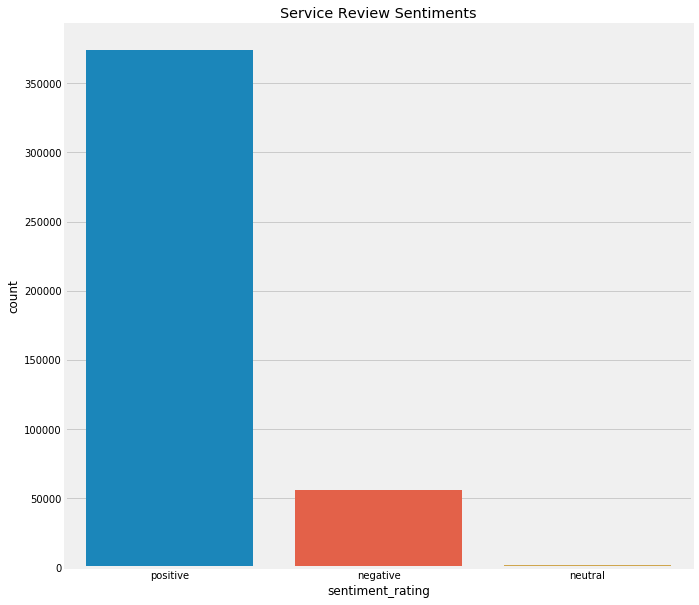

In [30]:
plt.figure(figsize=(10,10))
svc_sentiment = sns.countplot(lv_svc_reviews['sentiment_rating'])
plt.title('Service Review Sentiments')

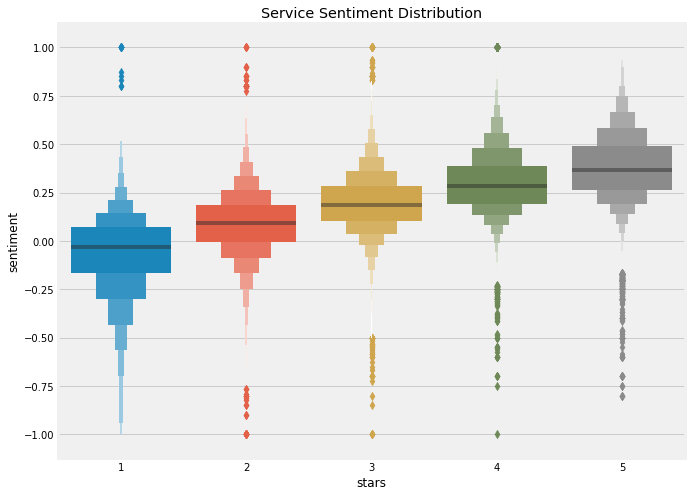

In [32]:
#Box Plot of Sentiment
plt.figure(figsize=(10,8))
sns.boxenplot(x='stars', y='sentiment', data=lv_svc_reviews)
plt.title('Service Sentiment Distribution')
plt.show()

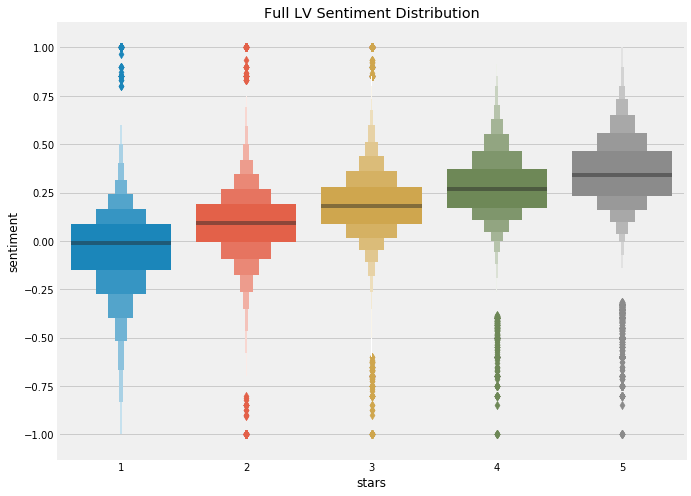

In [33]:
#Box Plot of Sentiment LV Reviews
plt.figure(figsize=(10,8))
sns.boxenplot(x='stars', y='sentiment', data=lv_reviews)
plt.title('Full LV Sentiment Distribution')
plt.show()